# 1. Import Library

In [1]:
# Downgrade version of TensorFlow and tf-keras

!pip install --upgrade "tensorflow<2.16" "tf-keras<2.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled ke

In [2]:
# Import Libraries
import time
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as tf_hub

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# plot chart
import plotly.graph_objects as go
import plotly.figure_factory as ff # for distribution plot
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# Download necessary NLTK data files
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from keras.models import load_model

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import plot_model


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print(tf.__version__)

2.15.1


# 2. Load Data

In [14]:
dir = '/content/drive/MyDrive/FP/'

In [15]:
data = pd.read_csv(f'{dir}fraud_email_clean_processed.csv')
data

,Unnamed: 0,text,class
0,0,supply quality china exclusive dimension unbea...,1
1,1,sidlet know thanks,0
2,2,dear friendgreetings youi wish accost request ...,1
3,3,mr cheung puihang seng bank ltddes voeux rd br...,1
4,4,surprising assessment embassy,0
...,...,...,...
10244,11923,called transferred room got answer send someth...,0
10245,11924,travel well look forward hearing report,0
10246,11926,follow flag follow upflag status flaggedmore info,0
10247,11927,sbwhoeop bsaturday january pmre h fyi foreign ...,0


In [16]:
print(f'Null : {data.isnull().sum()}')
print(f'Duplikasi : {data.duplicated().sum()}')

Null : Unnamed: 0      0
text          108
class           0
dtype: int64
Duplikasi : 0


In [17]:
data.drop_duplicates(inplace=True)

In [9]:
data.isnull().sum()

,0
Unnamed: 0,0
text,108
class,0


In [18]:
data.dropna(inplace=True)

# 4. Splitting Data

In [19]:
data

,Unnamed: 0,text,class
0,0,supply quality china exclusive dimension unbea...,1
1,1,sidlet know thanks,0
2,2,dear friendgreetings youi wish accost request ...,1
3,3,mr cheung puihang seng bank ltddes voeux rd br...,1
4,4,surprising assessment embassy,0
...,...,...,...
10244,11923,called transferred room got answer send someth...,0
10245,11924,travel well look forward hearing report,0
10246,11926,follow flag follow upflag status flaggedmore info,0
10247,11927,sbwhoeop bsaturday january pmre h fyi foreign ...,0


In [20]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(data.text,
                                                    data['class'],
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=data['class'])

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (7757,)
Val Size   :  (862,)
Test Size  :  (1522,)


# 5. Model

Tokenizing Using Count Vectorizer

In [21]:
# Get Vocabularies
#conver stopword menjadi list
stop_words = set(stopwords.words('english'))
stop_words_list = list(stop_words)
# Pipeline 2: Text Vectorization
vectorization_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.80, stop_words=stop_words_list))
])


In [22]:
X_train_vec = vectorization_pipeline.fit_transform(X_train)
X_val_vec = vectorization_pipeline.transform(X_val)
X_test_vec = vectorization_pipeline.transform(X_test)


In [23]:

# Access the CountVectorizer from the pipeline
vectorizer = vectorization_pipeline.named_steps['vectorizer']

# Finding the Number of Vocabs and Max Token Length in One Document
total_vocab = len(vectorizer.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  13576
Maximum Sentence Length :  6555 tokens


In [24]:
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                        input_shape=(1,))

text_vectorization.adapt(X_train)

In [25]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=32,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

## Model Train

In [26]:
# Model Training using LSTM
%%time
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
lstm_bidirectional = Sequential()
lstm_bidirectional.add(text_vectorization)
lstm_bidirectional.add(embedding)
lstm_bidirectional.add(Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
lstm_bidirectional.add(BatchNormalization())
lstm_bidirectional.add(Dropout(rate = 0.2, seed=seed))
lstm_bidirectional.add(Bidirectional((LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))))
lstm_bidirectional.add(BatchNormalization())
lstm_bidirectional.add(Dropout(rate = 0.2, seed=seed))
lstm_bidirectional.add(Dense(1, activation='sigmoid'))

#compile model
lstm_bidirectional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

CPU times: user 1.27 s, sys: 34.5 ms, total: 1.3 s
Wall time: 1.45 s


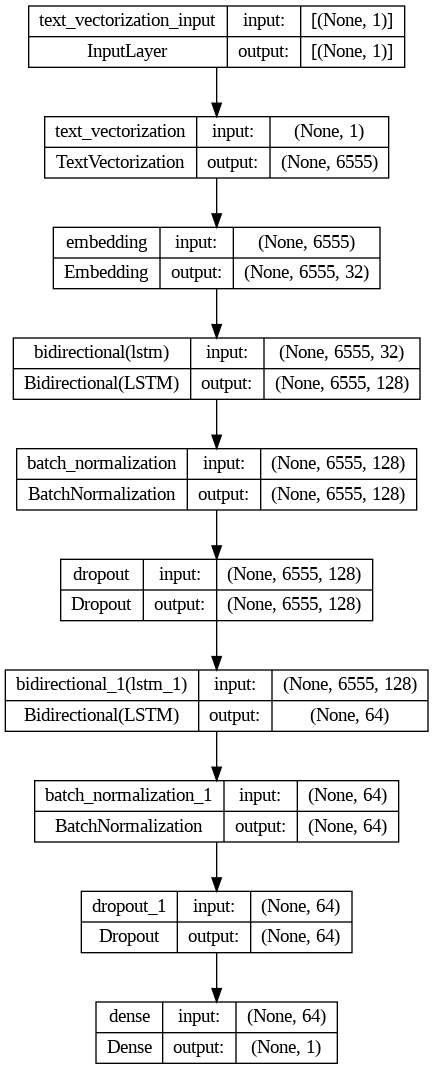

In [27]:
plot_model(lstm_bidirectional, to_file=f'{dir}model_architecture.png', show_shapes=True, show_layer_names=True)

In [28]:
#summary model
lstm_bidirectional.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 6555)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 6555, 32)          434432    
                                                                 
 bidirectional (Bidirection  (None, 6555, 128)         49664     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 6555, 128)         512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 6555, 128)         0         
                                                        

In [29]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath=f'{dir}lstm_bidirectional.keras', save_best_only=True, monitor='val_loss', mode='min')

In [30]:
# Melatih model
%%time
lstm_bidirectional_hist = lstm_bidirectional.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
243/243 [==============================] - 228s 879ms/step - loss: 0.1456 - accuracy: 0.9422 - val_loss: 0.2706 - val_accuracy: 0.9350
Epoch 2/50
243/243 [==============================] - 201s 829ms/step - loss: 0.0469 - accuracy: 0.9826 - val_loss: 0.1850 - val_accuracy: 0.9223
Epoch 3/50
243/243 [==============================] - 194s 799ms/step - loss: 0.0325 - accuracy: 0.9884 - val_loss: 0.2341 - val_accuracy: 0.9548
Epoch 4/50
243/243 [==============================] - 194s 799ms/step - loss: 0.0311 - accuracy: 0.9871 - val_loss: 0.0800 - val_accuracy: 0.9733
Epoch 5/50
243/243 [==============================] - 184s 757ms/step - loss: 0.0238 - accuracy: 0.9903 - val_loss: 0.4965 - val_accuracy: 0.8770
Epoch 6/50
243/243 [==============================] - 186s 764ms/step - loss: 0.0353 - accuracy: 0.9867 - val_loss: 6.1774 - val_accuracy: 0.4269
Epoch 7/50
243/243 [==============================] - 181s 744ms/step - loss: 0.0250 - accuracy: 0.9899 - val_loss: 5.3741 -

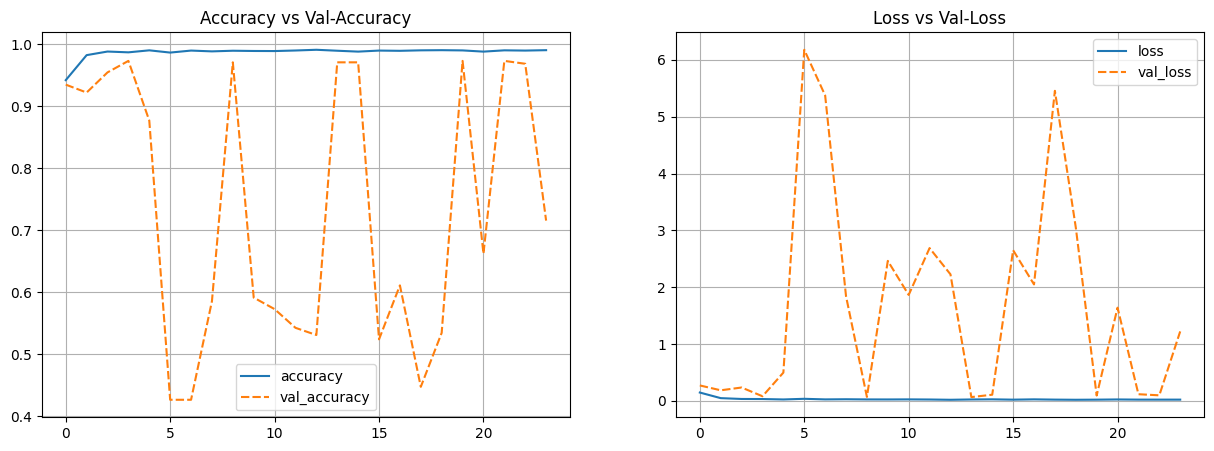

In [31]:
# Plot Training Results

lstm_bidirectional_hist_df = pd.DataFrame(lstm_bidirectional_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=lstm_bidirectional_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=lstm_bidirectional_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [32]:
lstm_bidirectional = load_model(f'{dir}lstm_bidirectional.keras')

In [33]:
# Prediksi
y_pred = lstm_bidirectional.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Buat classification report dengan nama kelas
target_names = ['Not Fraud', 'Fraud']
print(classification_report(y_test, y_pred_class, target_names=target_names))

48/48 [==============================] - 16s 285ms/step
              precision    recall  f1-score   support

   Not Fraud       0.97      0.98      0.98       873
       Fraud       0.98      0.96      0.97       649

    accuracy                           0.97      1522
   macro avg       0.97      0.97      0.97      1522
weighted avg       0.97      0.97      0.97      1522



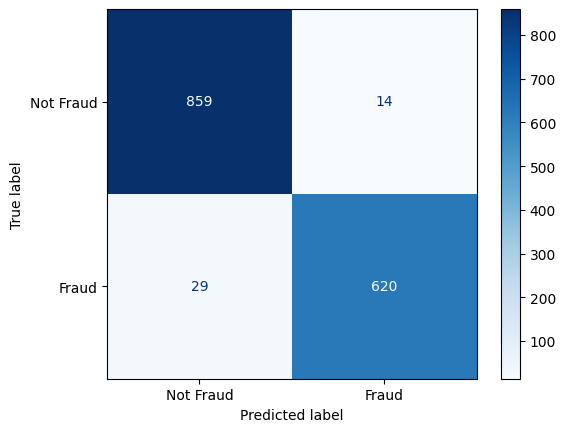

In [34]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [35]:
# Freze model

lstm_bidirectional.trainable = False
lstm_bidirectional.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 6555)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 6555, 32)          434432    
                                                                 
 bidirectional (Bidirection  (None, 6555, 128)         49664     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 6555, 128)         512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 6555, 128)         0         
                                                        

In [36]:
#save model
lstm_bidirectional.save(f'{dir}lstm_bidirectional.keras')

# Save Model

In [37]:
#convert model to tf
lstm_bidirectional.save(f'{dir}lstm_bidirectional', save_format='tf')

# WordCloud Fraud

In [38]:
#membuat dataframe baru yang isinya cuma Normal
Fraud_data = data[data['class'] == 1]
Fraud_data.head()

,Unnamed: 0,text,class
0,0,supply quality china exclusive dimension unbea...,1
2,2,dear friendgreetings youi wish accost request ...,1
3,3,mr cheung puihang seng bank ltddes voeux rd br...,1
8,8,greeting barrister robert williamscdear friend...,1
12,12,soliciting business venture partneshipdear sir...,1


(-0.5, 1599.5, 599.5, -0.5)

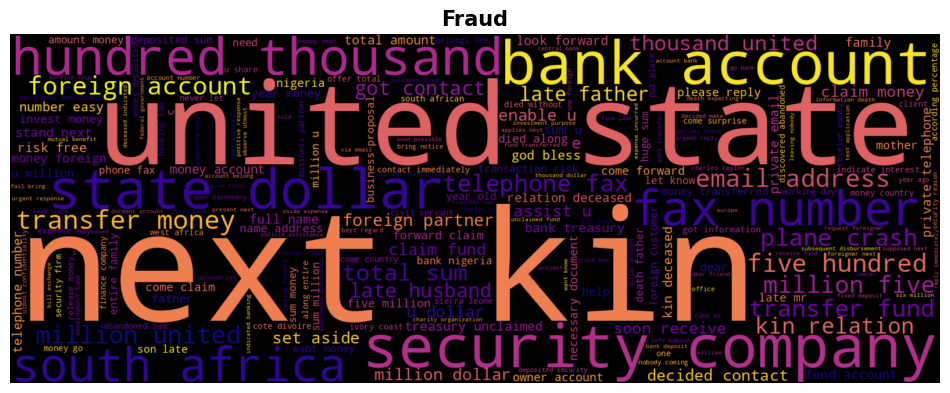

In [39]:
# wordcloud dari status Normal
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(Fraud_data.text))

plt.title("Fraud", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

# WordCloud Normal

(-0.5, 1599.5, 599.5, -0.5)

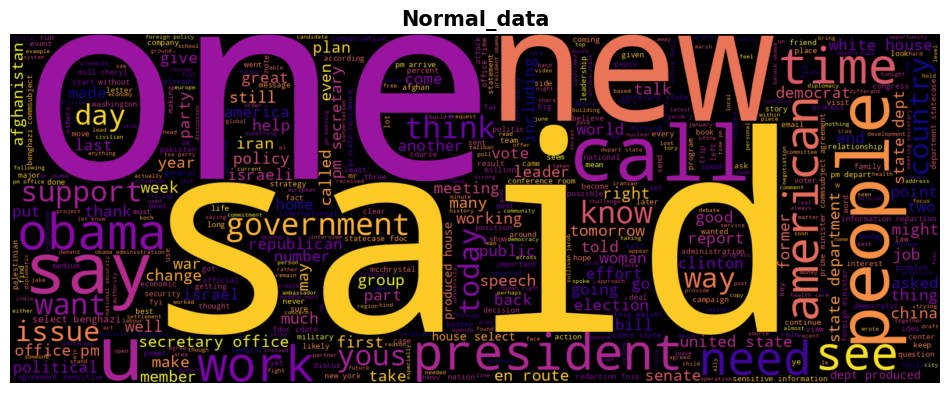

In [40]:
#membuat dataframe baru yang isinya cuma Normal
Normal_data = data[data['class'] == 0]
Normal_data.head()

# wordcloud dari status Normal
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(Normal_data.text))

plt.title("Normal_data", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')